In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt


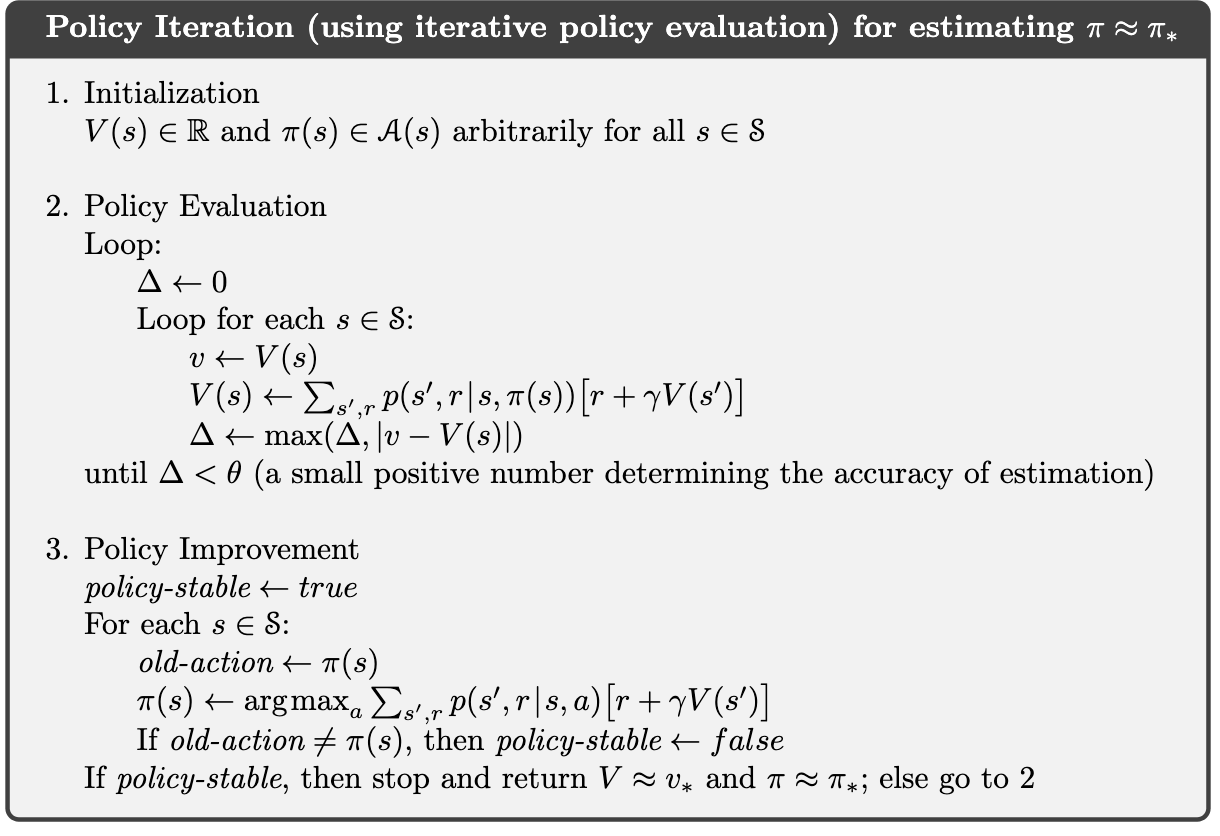

In [ ]:
def policy_eval(env, policy, discount_factor, theta):
    nS = env.observation_space.n  # number of states
    nA = env.action_space.n       # number of actions
    V = np.zeros(nS)              # initialize value function
    P = env.P                     # environment dynamics

    while(True):
        delta = 0                 # track maximum value change
        for s in range(nS):
            v = V[s]              # old value of state s
            new_V = 0             # new value estimate
            for a in range(nA):
                for prob, s_prime, reward, done in P[s][a]:
                    if done:  # terminal state
                        new_V += policy[s][a] * prob * reward
                    else:     # non-terminal state
                        new_V += policy[s][a] * prob * (reward + discount_factor * V[s_prime])
            delta = max(delta, abs(v - new_V))  # track largest change
            V[s] = new_V         # update state value
        if delta < theta:        # check convergence
            break
    return V                     # return value function

                


In [ ]:
def policy_iteration(env, discount_factor, theta):
    nS = env.observation_space.n  # number of states
    nA = env.action_space.n       # number of actions
    P = env.P                     # environment dynamics
    policy = np.ones([nS, nA]) / nA  # start with uniform random policy
    V = np.zeros(nS)              # initialize value function

    while(True):
        # policy evaluation
        V = policy_eval(env, policy, discount_factor, theta)

        policy_stable = True      # track if policy changes

        for s in range(nS):
            old_action = np.argmax(policy[s])  # current best action
            action_values = np.zeros(nA)       # store Q(s,a)

            # compute action values
            for a in range(nA):
                for prob, s_prime, reward, done in P[s][a]:
                    if done:  # terminal state
                        action_values[a] += prob * reward
                    else:
                        action_values[a] += prob * (reward + discount_factor * V[s_prime])

            new_action = np.argmax(action_values)  # best action under new policy

            # update policy to be greedy
            for a in range(nA):
                if a == new_action:
                    policy[s][a] = 1
                else:
                    policy[s][a] = 0

            # check if policy changed
            if old_action != new_action:
                policy_stable = False

        if policy_stable:  # stop if no changes
            break

    return policy, V  # return optimal policy and value function

